# Josephson Junction QComponent Demo Notebook

This demo notebook describes two types of Josephson Junction (JJ) qcomponents available in Qiskit Metal, including a "Manhattan"-style JJ and a "Dolan"-style JJ. In addition, we demonstrate how to insert these realistic JJ structures in between the capacative pads of the transmon pocket qcomponent, forming a realistic qubit design. 

Let's start to importing some key modules:

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict #, open_docs

Next, we'll fire up the Qiskit Metal GUI: 

In [2]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

Next, let's see what a Manhattan-style JJ looks like. We'll import the qcomponent and place it in our design, calling it "JJ1":

In [3]:
from qiskit_metal.qlibrary.qubits.JJ_Manhattan import jj_manhattan
design.overwrite_enabled = True
jj1 = jj_manhattan(design, 'JJ1', options=dict())
gui.rebuild()
gui.autoscale()

We can take a screenshot of the GUI to see what our JJ looks like up close::

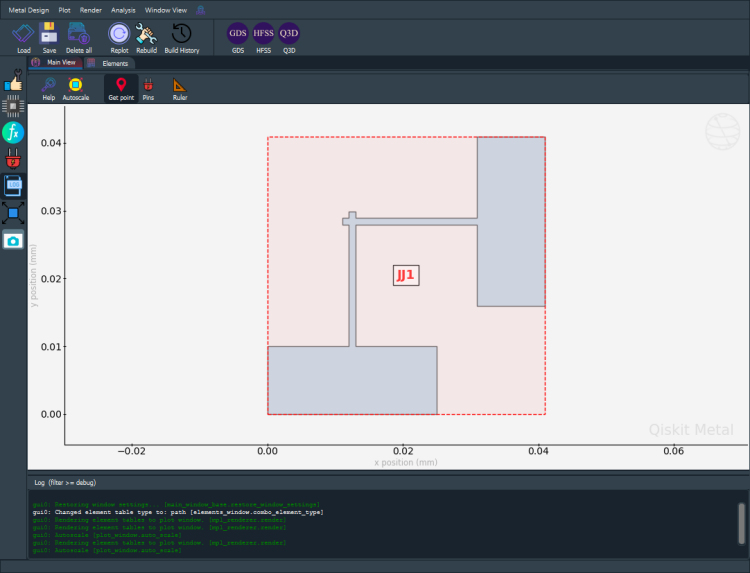

In [4]:
gui.rebuild()
gui.autoscale()
gui.edit_component('JJ1')
gui.zoom_on_components(['JJ1'])
gui.highlight_components(['JJ1'])
gui.screenshot()

Note that you'll have to zoom in to see the JJ qcomponent since the default dimensions are quite small (micrometers instead of mm!) For the Manhattan-style junction, we see two crossing rectangles each connected to a larger rectangular pad. All of the metal is part of the same layer, as opposed to the two-layer Dolan-style design that we'll see below. 

Also note that for both JJ qcomponents, the coordinates (pos_x, pos_y) define the lower-left corner of the bottom rectangle. Since the default values of these coordinates are zero, we see that the bottom left corner is at the origin. 

Now, let's take a look at a Dolan-style JJ qcomponent design. We'll call this one "JJ2" and we'll place it such that the bottom left corner is at the coordinate (0.1, 0.0) so that we can look at the two qcomponents side-by-side in our design: 

In [5]:
from qiskit_metal.qlibrary.qubits.JJ_Dolan import jj_dolan
design.overwrite_enabled = True
jj2 = jj_dolan(design, 'JJ2', options=dict(pos_x="0.1", pos_y="0.0"))
gui.rebuild()
gui.autoscale()

We can again take a GUI screenshot to see how this JJ differs from the Manhattan-style one:

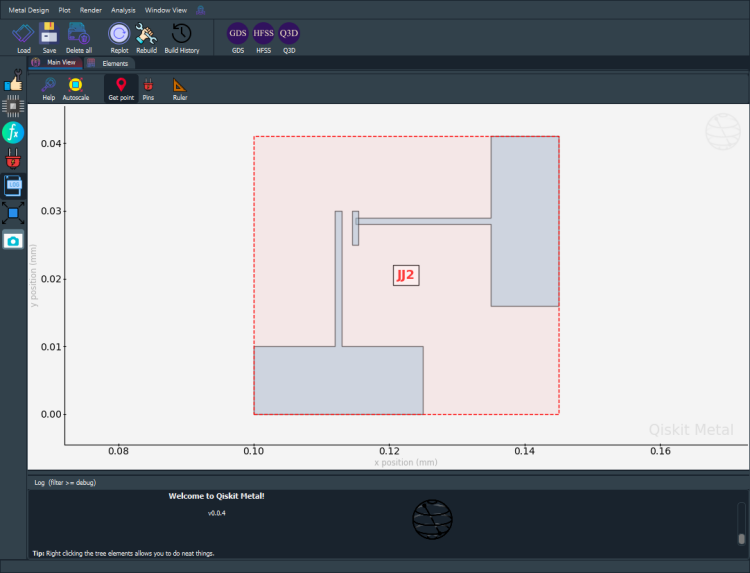

In [6]:
gui.rebuild()
gui.autoscale()
gui.edit_component('JJ2')
gui.zoom_on_components(['JJ2'])
gui.highlight_components(['JJ2'])
gui.screenshot()

You'll notice that the Dolan-style JJ has a similar structure as the Manhattan-style JJ but the second set of rectangles is translated so that they no longer overlap with the first pair of rectangles. In addition, we see a smaller rectangle drawn which is actually defined to be on a different metal layer than the other rectangles. This reflects the fact that in Dolan-style JJ fabrication, there are two separate metal levels used in the shadow masking process. 

### Inserting Josephson Junctions into a Transmon Qubit Design

In a realistic quantum chip design, the JJs would be located in between the large pads of the transmon pocket. Before we show what this would actually look like, let's delete the two JJs that we've drawn and start from scratch. 

In [7]:
jj1.delete()
jj2.delete()

You may have to hit the "Replot" button in the GUI after deleting. Now, let's create an instance of a basic transmon pocket qcomponent, using all default settings:

In [8]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
design.overwrite_enabled = True
q1 = TransmonPocket(design, 'qubit1', options=dict())
gui.rebuild()
gui.autoscale()

When we zoom in and see that the middle of the "JJ region" of the transmon pocket is at the origin. This is the region we will place our actual JJ qcomponent. Since we want the larger rectangular pads of the JJ qcomponent to overlap with the large rectangular pads of the transmon pocket, we'll have to pick a suitable (x,y) coordinate for the JJ. Here's an example of placing the Manhattan-style JJ in this region:

In [9]:
from qiskit_metal.qlibrary.qubits.JJ_Manhattan import jj_manhattan
design.overwrite_enabled = True
jj1 = jj_manhattan(design, 'JJ1', options=dict(pos_x="-0.015", pos_y="-0.02"))
gui.rebuild()
gui.autoscale()

We can take a GUI screenshot to see how the transmon qubit looks with the JJ inserted:

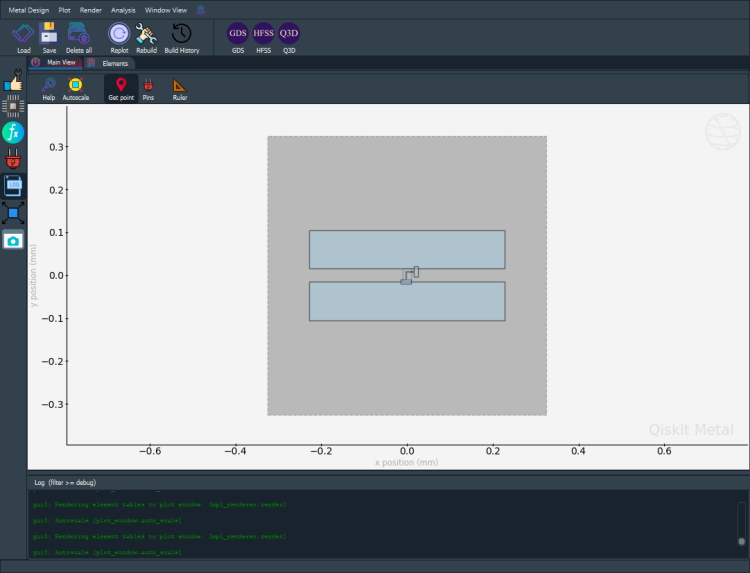

In [10]:
gui.rebuild()
gui.autoscale()
gui.edit_component('qubit1')
gui.zoom_on_components(['qubit1'])
gui.screenshot()

We can zoom in on the actual JJ to see how the pads overlap with the large rectangular pads of the transmon:

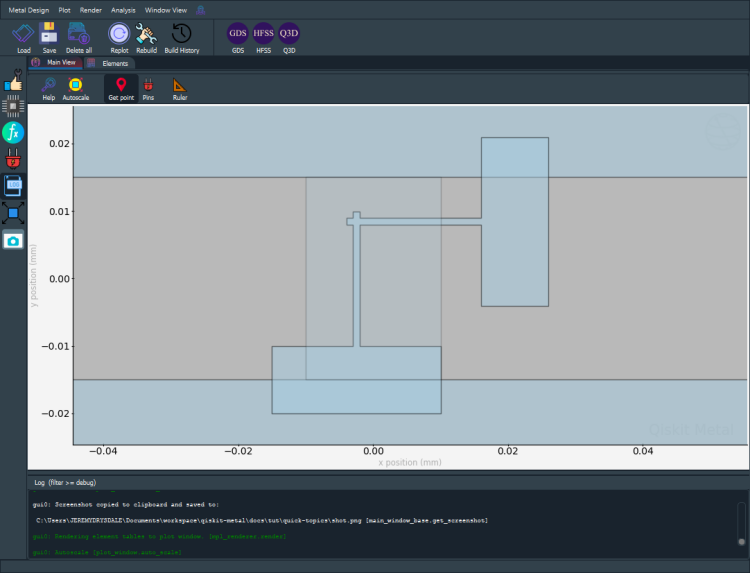

In [11]:
gui.rebuild()
gui.autoscale()
gui.edit_component('JJ1')
gui.zoom_on_components(['JJ1'])
gui.screenshot()

In the same way, we can place another transmon pocket at (1,1) and then place a Dolan-style JJ inside:

In [12]:
design.overwrite_enabled = True
q2 = TransmonPocket(design, 'qubit2', options=dict(pos_x="1.0"))
jj2 = jj_dolan(design, 'JJ2', options=dict(pos_x="0.985", pos_y="-0.02"))
gui.rebuild()
gui.autoscale()

Let's take a screenshot to see what the transmon qubit looks like with the JJ inserted:

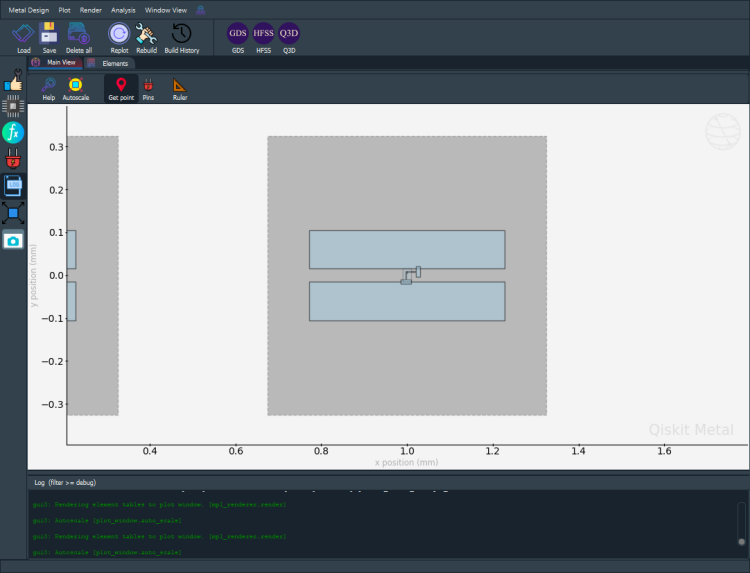

In [13]:
gui.rebuild()
gui.autoscale()
gui.edit_component('qubit2')
gui.zoom_on_components(['qubit2'])
gui.screenshot()

Lastly, we can zoom in even more to see how the Dolan-style JJ looks while connected to the pads of the transmon:

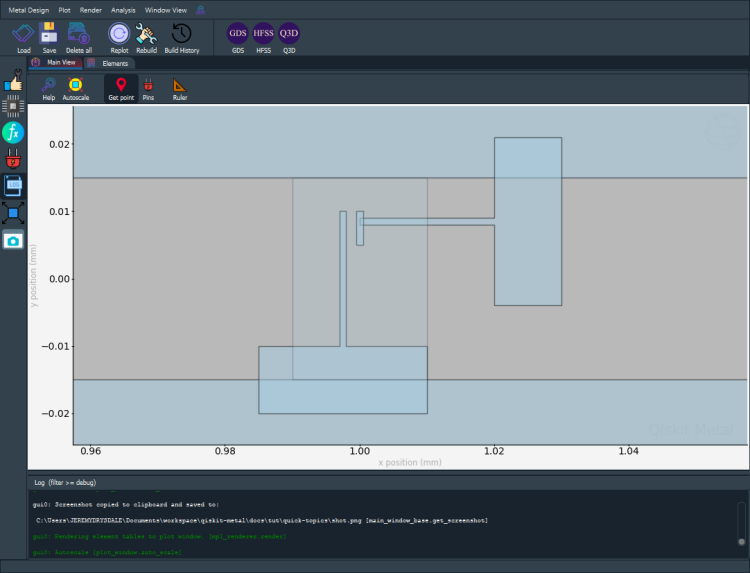

In [14]:
gui.rebuild()
gui.autoscale()
gui.edit_component('JJ2')
gui.zoom_on_components(['JJ2'])
gui.screenshot()